#Chapter 8. 도식화와 시각화
- matplotlib은 주로 2D 도표를 위한 데스크톱 패키지로, 출판물 수준의 도표를 만들 수 있도록 설계 되어있음

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt

In [ ]:
%matplotlib inline

##8.1 matplotlib API 간략하게 살펴보기

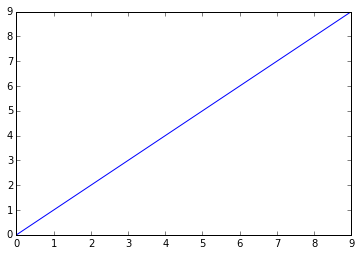

In [5]:
plt.plot(np.arange(10))

###8.1.1 Figure와 Subplot
- matplotlib에서 그래프는 Figure 객체 내에 존재한다.
- 그래프를 위한 새로운 Figure는 plt.figure를 사용해서 생성할 수 있다.

In [16]:
%matplotlib qt

In [17]:
fig = plt.figure()

In [18]:
ax1 = fig.add_subplot(2,2,1)

In [19]:
ax2 = fig.add_subplot(2,2,2)

In [20]:
ax3 = fig.add_subplot(2,2,3)

In [21]:
fig.show()

In [22]:
from numpy.random import randn

In [23]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

In [24]:
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))

In [25]:
ax3.plot(randn(50).cumsum(),'k--')

In [26]:
fig.show()

In [27]:
fig, axes = plt.subplots(2,3)

In [28]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A67A588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E1BDBA8>]], dtype=object)

<br><br>
###서브플롯 간 간격 조절하기
- matplotlib은 서브플롯 간의 적당한 간격과 여백을 추가해준다.
- 이 간격은 전체 그래프의 높이와 너비에 따라 상대적으로 결정된다.
- 그래서 프로그램을 사용하던가 아니면 직접 GUI 윈도우의 크기를 조정하면 자동으로 그래프 크기가 조절된다.
- subplot 간의 간격은 Figure의 subplots_adjust 메서드를 사용해서 쉽게 바꿀 수 있다.

In [29]:
fig.subplots_adjust(left = None, bottom=None, right=None, top=None, wspace=None, hspace=None)

In [30]:
fig, axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        #bins=sample의 수, alpha=그래프의 명암(투명도(0~1))
        axes[i,j].hist(randn(500), bins=50, color='k', alpha=0.5)

#wspace, hspace는 각각의 여유공간의 크기를 조절
plt.subplots_adjust(wspace=0, hspace=0)

###8.1.2 색상, 마커, 선 스타일
- matplotlib에서 가장 중요한 plot함수는 X와 Y 좌표 값이 담긴 배열과 추가적으로 색상과 선 스타일을 나타내는 축약 문자열을 인자로 받는다.

In [36]:
%matplotlib inline

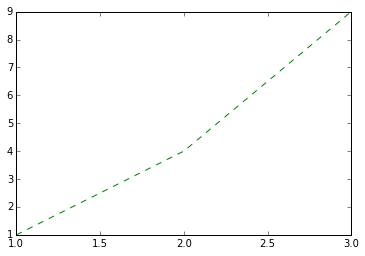

In [37]:
# X와 Y좌표 값이 담긴 배열과 추가적으로 색상과 선스타일을 나타내는 축약 문자열을 인자로받음
# 녹색 점선으로 그려진 x 대 y 그래프
x= (1,2,3)
y= (1,4,9)
plt.plot(x,y,'g--')

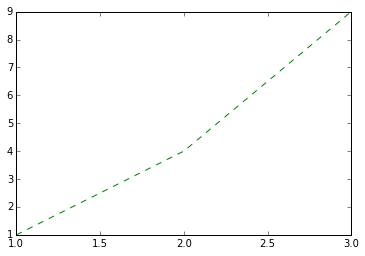

In [38]:
# 그래프를 원하는 형식으로 생성하기 위해 문자열을 지저분하게 섞어 쓰고 싶지 않는 경우
# 앞에서 만든 그래프를 좀더 명시적인 방법으로 표현
plt.plot(x,y,linestyle='--',color='g')

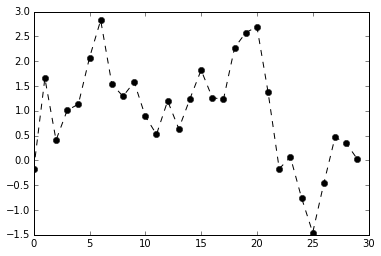

In [39]:
# 선 그래프는 특정 지점의 실제 데이터를 돋보이게 하기 위해 마커를 추가하기도 한다.
plt.plot(randn(30).cumsum(), 'ko--')

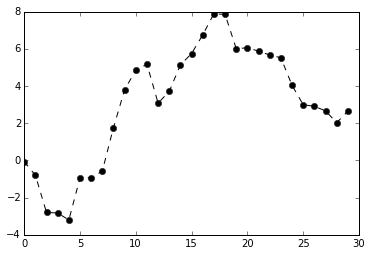

In [40]:
plt.plot(randn(30).cumsum(),color='k',linestyle='--',marker='o')

In [41]:
data = randn(30).cumsum()

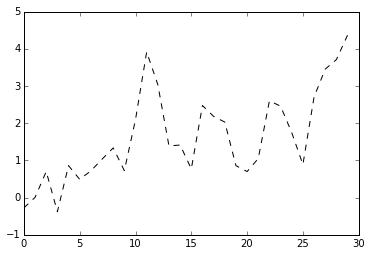

In [42]:
plt.plot(data, 'k--',label='Default')

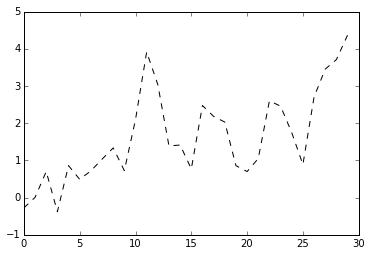

In [43]:
plt.plot(data,'k--')

##8.2 pandas에서 그래프 그리기


###8.2.1 선 그래프

In [2]:
from pandas import Series,DataFrame
import numpy as np

In [85]:
s = Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))

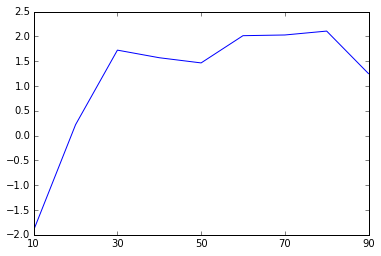

In [86]:
s.plot(xticks=[10,30,50,70,90],xlim=10) #10~90의 데이터를 index=10부터 출력
#use_index=True, index 사용

In [88]:
df = DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B','C','D'],index=np.arange(0,100,10))

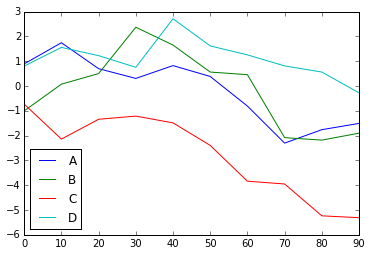

In [89]:
df.plot()

###8.2.2 막대 그래프

In [2]:
import matplotlib.pyplt as plt
import numpy as np
from numpy.random import randn
from pandas import Series,DataFrame
import numpy as np

In [3]:
fig, axes = plt.subplots(2,1)

TclError: Can't find a usable init.tcl in the following directories: 
    C:/Users/GoHyunyoung98/AppData/Local/Enthought/Canopy/App/appdata/canopy-1.5.4.3105.win-x86_64/lib/tcl8.5 C:/Users/GoHyunyoung98/AppData/Local/Enthought/Canopy/User/lib/tcl8.5 C:/Users/GoHyunyoung98/AppData/Local/Enthought/Canopy/lib/tcl8.5 C:/Users/GoHyunyoung98/AppData/Local/Enthought/Canopy/User/library C:/Users/GoHyunyoung98/AppData/Local/Enthought/Canopy/library C:/Users/GoHyunyoung98/AppData/Local/Enthought/Canopy/tcl8.5.2/library C:/Users/GoHyunyoung98/AppData/Local/Enthought/tcl8.5.2/library



This probably means that Tcl wasn't installed properly.


In [3]:
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [1]:
%matplotlib tk

In [8]:
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)

In [9]:
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)